# Makine Öğrenmesi: 
Denetimli öğrenme yöntemlerinden biri olan ve yapay zeka dünyasının giriş kapısı kabul edilen doğrusal regresyon modelleri ve bu modellere özel optimizasyon yöntemleri ele alınır.

In [1]:
import sys
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

# 21. Doğrusal Regresyon Modelleri

1. Basit Doğrusal Regresyon
2. Çoklu Doğrusal Regresyon
3. Ridge Regresyon
4. Lasso Regresyon
5. Elastic Net Regresyonu

* Her Model İçin
    * Model
    * Tahmin
    * Model Optimizasyonu
    

# 21.1.  Basit Doğrusal Regresyon'a Giriş

1. Basit Doğrusal Regresyon
    * Bir bağımlı ve bir bağımsız değişkenin olması.
    * Temel Amaç: Bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır. Değişkenler arasındaki ilişkiyi modellemek.
    
        * Modellemek: çeşitli kavramlar arasındaki ilişkileri belirli matematiksel formlarda ifade etmektir.

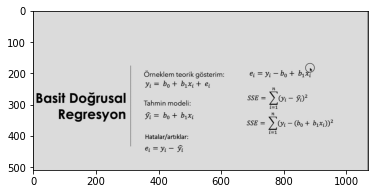

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("basit_dogrusal_regresyon.png"))

        
    * yi = b0+b1xi: Bu fonksiyonu elde etmek. 
    
        * yi şapka= tahmin edilen değerler, modelleme 
        * b0 veb1= veri setinden bulmak gereken parametreler = ZEKA
        * b0 = doğrunun y ekseninde kestiği nokta
        * b1 = Doğrunun eğimi
        * ei, epsilon,=Hata Terimi=Artık
            * ei=Gerçek değer ile tahmin edilen değer arasındaki fark
            
        * SSE=Sum of Squared Errors= Hata kareler toplamı

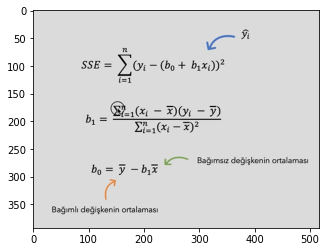

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("SSE.png"))

* artıklar

* Tahmin

* Geometrik Gösterim

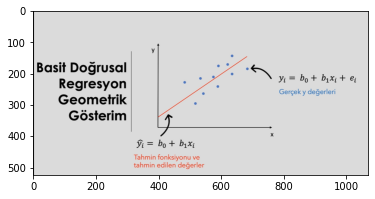

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("basit_dogrusal_regresyon_geometrik_gosterim.png"))

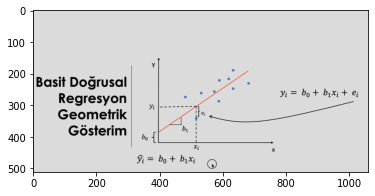

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("ornek.png"))

# 21.2. Basit Doğrusal Regresyon Model

In [6]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
# indexi değişken olarak aldığı için usecols kullanarak kaldırılabilir
# veya iloc ile çıkarılabilir
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# df = df.iloc[:,1:len(df)]

In [8]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T # betimsel istatistik

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
df.isnull().values.any()

False

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


TV reklam harcamaları arttıkça sales(satış) da artar.
Pozitif yönlü bir ilişki vardır.
"sales" değişkenini *bağımlı değişken* olarak kabul ettiğimizde diğer 3 değişkenle kıyasladığımızda en anlamlı etki düzeyi yüksek olan değişken TV dir.

Bir reklam harcamasının etkileri ile alakalı veri setidir.

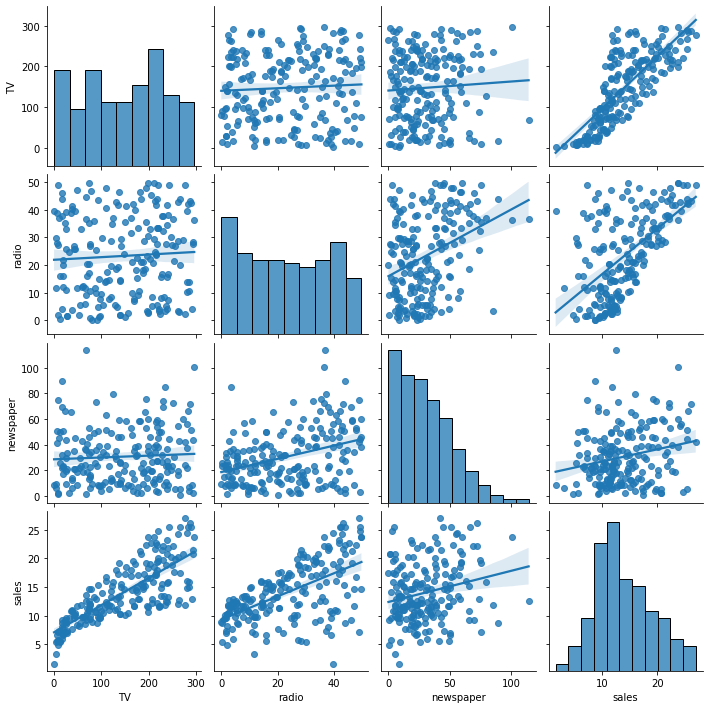

In [12]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

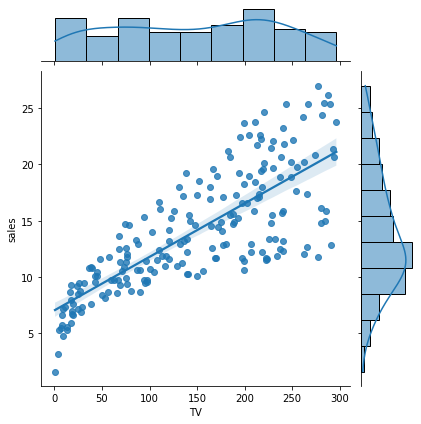

In [13]:
sns.jointplot(x ="TV", y = "sales",
              data =df, kind = "reg");
# TV harcalamarı artıkça satışlar artmış
# doğrusal ve pozitif bir korelasyon var.

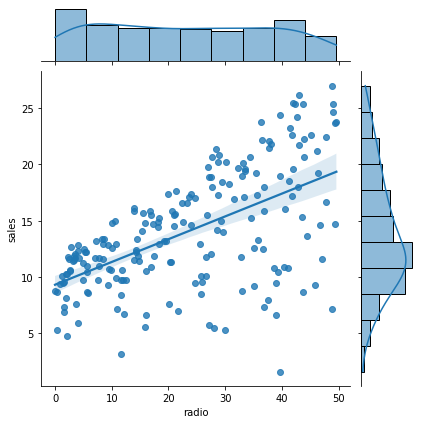

In [14]:
sns.jointplot(x ="radio", y = "sales",
              data =df, kind = "reg");
# radio harcalamarı artıkça satışlar artmış
# doğrusal ve pozitif bir korelasyon var.

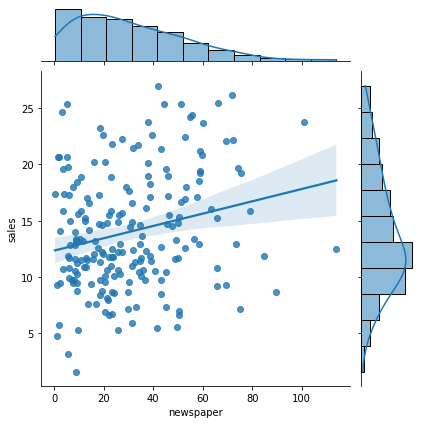

In [15]:
sns.jointplot(x ="newspaper", y = "sales",
              data =df, kind = "reg");
# newspaper harcalamarı artıkça satışlar ??
# doğrusal ve pozitif bir korelasyon var.

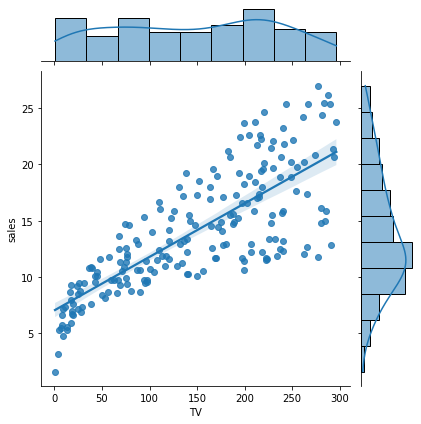

In [16]:
import seaborn as sns
sns.jointplot(x ="TV", y = "sales",
              data =df, kind = "reg");
# TV harcalamarı artıkça satışlar artmış
# doğrusal ve pozitif bir korelasyon var.

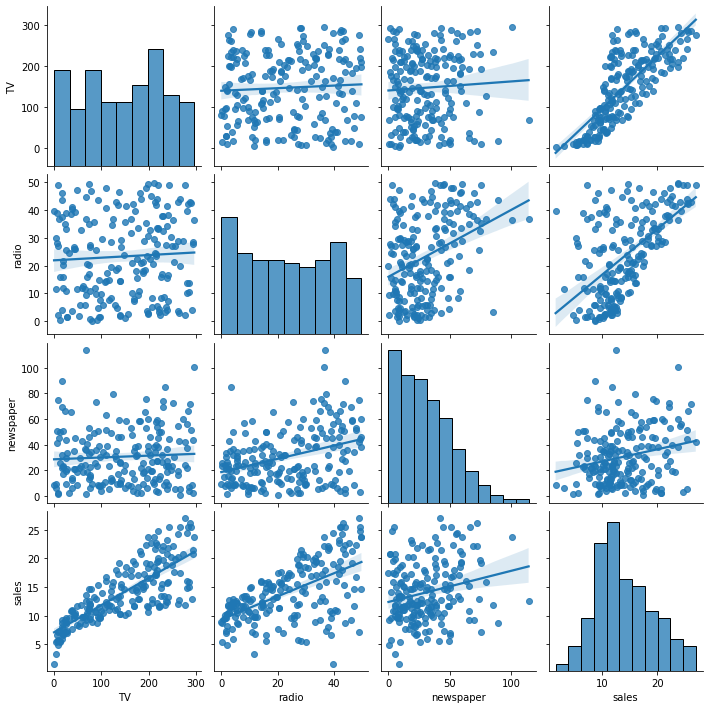

In [17]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

## Statsmodels ile modelleme

In [18]:
import statsmodels.api as sm

In [19]:
import numpy as np

In [20]:
X = df[["TV"]] # matrix olarak kaydet
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
# bağımsız değişken = x
# bağımlı değişken = y
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [22]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
lm = sm.OLS(y,X) # modeli kur

In [24]:
# X bağımsız değişken
# y bağımlı değişken
model = lm.fit()
#modeli fit etme: Modeli kurmak
# En küçük kareler methodu = "Least Squares"

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.47e-42
Time:                        14:09:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*R-squared:* Bağımsız değişkenin bağımlı değişkendeki değişkenliğini açıklama başarısıdır

*R-squared* de ilgili ilgisiz değişkenler eklememiz yanıltıcıdır. *Adj. R-squared* çok değişkenlerde daha düzgün sonuçlar almamızı sağlar.

*F-statistic:* Model anlamlı mı?

*Prob (F-statistic):* p-value

b0 değeri burada const değeridir(bağımsız değişken). coef modelin kat sayısına parametre denir. 
* b0 -> const
* b1 -> TV 
* P>|t| yani p-value değerleri 0.005 ten küçük H0 reddedilir. Kat sayılarımız anlamlıdır.
* %95 ile güven aralıkları görünüyor. 

Diğer değişkenlerde değişiklik olmadığında yani TV nin etkisi olmadığında ortalama satış değeridir. Yani bir TV reklam harcamında birimlik artış olduğunda ortalama bu kadarlık artış olur. (7.0326)

In [26]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.47e-42
Time:                        14:09:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.params # model parametreleri

Intercept    7.032594
TV           0.047537
dtype: float64

In [28]:
model.summary().tables[1] # birinci indexler katsayıları verir

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [29]:
model.conf_int() # kat sayıların güven aralıkları

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [30]:
model.f_pvalue # modelin anlamlılığına ilişkin p-value

1.467389700194647e-42

In [31]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [32]:
print("fvalue: ", "%.2f" % model.fvalue) # virgülden sonra 2 basamak al

fvalue:  312.14


In [33]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [34]:
# modelin anlamlılığı, mean squared error
model.mse_model
# ort sı 14 olan olan satış değişkeni için korkunç bir hata

3314.618166868649

In [35]:
model.rsquared_adj

0.6099148238341623

In [36]:
model.fittedvalues[0:5] # tahmin edilen satış değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [37]:
y[0:5] # gerçek satış değerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [38]:
df["TV"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [39]:
df["sales"]

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [40]:
# Gözlenmeyen x değerleri geldiğinde fonksiyonda yerine yazılarak tahmin edilir
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


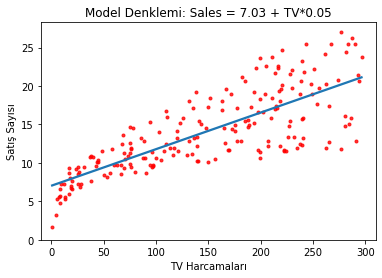

In [41]:
import seaborn as sns
import pandas as pd
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

Yukarıdaki kodda regresyon modelimizi görselleştirme işlemini gerçekleştirdik. Tek tek açıklayacak olursak;

1.satır ve 2.satır: Veri görselleştirme için gerekli kodları girdik.

3.satır: TV ve satış değişkeni üzerinden bir regresyon görselleştirmesi yapmak için bu satırdaki kodu girdik. Bu satırdaki ci=None güven aralığı koymaması için girilmiş bir koddur.

4.satır: Regresyon modelimize bir başlık ekledik.

5.ve 6. satır: y-ekseni ve x-eksenini adlandırma işlemini yaptık.

Mavi çizgi basit bir fonksiyondur. Başta söylemiş olduğum temel amacımıza ulaşmış olduk. Yani bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmuş olduk.

In [42]:
# import seaborn as sns
# import pandas as pd
# g = sns.regplot(x="TV", y="sales", data=df,
#                 ci=None, scatter_kws={'color':'r', 's':9})
# g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
# g.set_ylabel("Satış Sayısı")
# g.set_xlabel("TV Harcamaları")

# plt.xlim(-10,310)
# plt.ylim(bottom=0);

# # pazarlama yönetici, bu yıl tv harcamalarına ne kadar harcarsam satışım ne kadar artar?
# # Neden Tahmin etmek gerekiyor?

## Scikit-learn ile LinearRegression modeli oluşturma

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
X = df[["TV"]]
y = df["sales"]

In [45]:
# MODEL nesnesi oluşturmak
reg = LinearRegression()

In [46]:
# X bağımsız değişken
# y bağımlı değişken
model = reg.fit(X, y) # nesne olustur
#modeli fit etme: Modeli kurmak
model.get_params() # model bir nesnesi

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [47]:
str(model)

'LinearRegression()'

In [48]:
# dir(model)
#nesne içinde alabileceğimiz bilgiler
# coeff katsayıdır.

In [49]:
#beta 0 değeri
# sbit değer
model.intercept_

7.032593549127695

In [50]:
# beta 1 kat sayısı
model.coef_

array([0.04753664])

### R^2 ifadesi modelin skoru
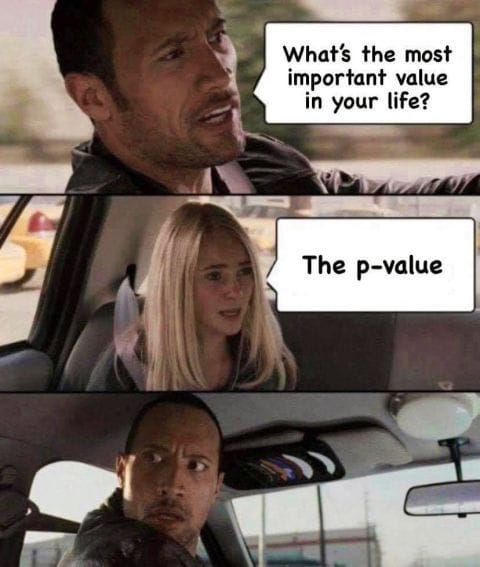 

In [51]:
# r^2 ifadesi modelin skoru
# bağımlı değişkenliğin, bağımsız değişkenlerce açıklanma yüzdesidir
# satışlardaki değişimin yüzde 60 bu algoritamlarla açıklanmaktadır
model.score(X,y)

# tv satışarların %60 etkliyor.

0.611875050850071

In [52]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

# 21.3. Basit Doğrusal Regresyon: Tahmin

Model Denkelemi:

    Sales = 7.03 + TV*0.04
    
    Örneğin 30 birim TV harcaması olduğunda satışların tahmin değeri ne olur?

In [53]:
7.03 + 30*0.04

8.23

In [54]:
X = df[["TV"]] # Dataframe
y = df["sales"] # Series
# MODEL
reg = LinearRegression()
model = reg.fit(X, y)

In [55]:
#parametresi= bağımsız değişken değeri, yani tv harcamaları
# TV harcaması
model.predict([[30]])

array([8.45869276])

In [56]:
# 30 birimlik tv harcaması yaparsam ne kadar satış yaparım.? 
model.intercept_ + model.coef_*30

array([8.45869276])

In [57]:
# birden fazla değer ile  ne kadar 
# 5, 90, 200 birim  tv harcamam  ile ne kadar satış yaparım.
yeni_veri=[[5],[90],[200]]

model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

# 21.4. Artıklar: Basit Doğrusal Regresyon   
**Artıklar**
> amaç: gerçek değer ile tahmin değer farkını minimun yapmak.
> 
### MSE: Hata kareler ortalaması

### RMSE: Hata Kareler Ortalamasının Karekökü

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.47e-42
Time:                        14:10:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
mse = mean_squared_error(y, model.fittedvalues)

In [61]:
mse

10.512652915656757

In [62]:
import numpy as np
rmse = np.sqrt(mse)

In [63]:
rmse

3.2423221486546887

In [64]:
# tv harcamalarımız: bağımsız değişken
reg.predict(X)[0:10]
# tahmin et, Bağımsız değerlerin ne olacağını?

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [65]:
# satışlar gerçek değerler
y.head()
# veri setindeki bağımlı halindeki değerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [66]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [67]:
# ne kadar başarı başarılı bir işlem yapmışsız?
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [68]:
# # ne kadar başarı başarılı bir işlem yapmışsız?
# gercek_y = y[0:10]
# tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [69]:
# # (sol gerçek değerler, sağ tahmin edilenler)
# hatalar = pd.concat([gercek_y,tahmin_edilen_y], axis = 1)
# # isimlendirme
# hatalar.columns=["gercek_y", "tahmin_edilen_y"]
# hatalar

In [70]:
#artık, Gerçek değer ile tahmin edilen hatalar arasındaki fark
k_t["hata"]= k_t["gercek_y"]-k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [71]:
# ortalama hata nedir?
#MSE
k_t["hata_kareler"]=k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [72]:
# bizim modelimiz şu kadar başarı,
import numpy as np
np.sum(k_t["hata_kareler"])

92.90350329638102

In [73]:
np.mean(k_t["hata_kareler"])
# hata kareler ortalaması nedir?

9.290350329638102

In [74]:
np.sqrt(np.mean(k_t["hata_kareler"]))

3.048007599996775

In [75]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

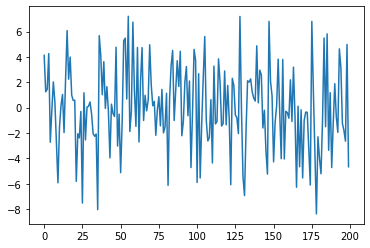

In [76]:
plt.plot(model.resid)

# Python ile Makine Öğrenmesi Örnek #1: Basit Doğrusal Regresyon (Simple Linear Regression)

In [77]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('satislar.csv')
#print(veriler)

In [79]:
# veri on isleme
## Bağımsız Değişken
aylar = veriler[['Aylar']]
#print(aylar)

## Bağımlı Değişken
satislar = veriler[['Satislar']]
#print(satislar)

satislar2 = veriler.iloc[:,:1].values
#print(satislar2)

In [80]:
#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(aylar,satislar,test_size=0.33, random_state=0)

In [81]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)


Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [82]:
#model inşası(linear regression)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
tahmin = lr.predict(x_test)

In [83]:
tahmin

array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

Text(0, 0.5, 'Satışlar')

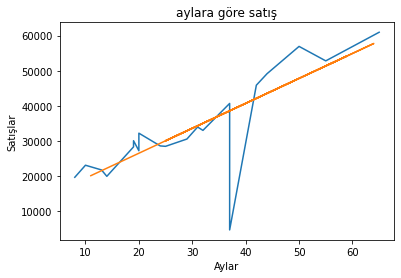

In [84]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))

plt.title("aylara göre satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")

### **Quiz 2: Basit Doğrusal Regresyon**

**Soru 1:
Basit Doğrusal Regresyon (Simple Linear Regression), kategorik verilerin sınıflandırılması için kullanılabilir.**

*Yanlış*

**Soru 2:
Python içerisindeki hangi kütüphanede basit doğrusal regresyon bulunur?**

*sklearn*

**Soru 3:
Aşağıdakilerden hangisi doğrusal regresyon formülünü en iyi şekilde ifade etmektedir. **

*(bağımlı değişken) = (katsayı)*(bağımsız değişken) + sabit*

# 22.1. Çoklu Doğrusal Regresyon'a Giriş
## Multiple Linear Regression

Temel amaç: Bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmak

amaç 2: Gerçek değer ile tahmin edilen değer arasındaki farkları minimum yapmak.


    * HATA KARELER ORTalamasını minimumunu bulmak.
    * Modeli içindeki katsayıları, Model içindeki bağımsız değişkenin etkilerini kontrol etmek için kullanılıyor.
    * soru? Buradaki katsayıları bulmak için birden farklı yaklaşım kullanılıyor? 
        * En küçük Matris ile
        * Gözlem sayısı 1000 geçince tersini alma işlemi imkansıza yaklaştığında, klasik yöntemlerle zorlaşır. 
    * Gredient dissent : parametre tahmin yöntemleri. katsayıları artıkça kullanılır.


_***Doğrusal Regresyon Varsayımları***_
1. Hatalar normal dağılır.
2. Hatalar birbirinden bağımsızdır ve aralarında otokorelasyon yoktur.
3. Her bir gözlem için hata terimleri varyansları sabittir.
4. Değişkenler ile hata terimi arasında ilişki yoktur.
5. Bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur. 



**Regresyon Modellerinin Avantajları ve Dezavantajları**
1. İyi anlaşılırsa diğer tüm Machine Learning ve Deep Learning konuları çok rahat kavranır.
2. Doğrusallık nedensellik yourmları yapılabilmesini sağlar. Bu durum aksiyoner ve stratejik modelleme imkanı verir.
3. Değişkenlerin etki düzeylerini ve anlamlılık değerlendirilebilir.
4. Bağımlı değişkendeki değişkenliğin açıklanması başarısı ölçülebilir.
5. Model Anlamlılığı değerlendirilebilir.

Dezavantajları
1. Varsayımları vardır
2. Aykırı gözlemlere daha fazla duyarlıdır.


# 22.2. Çoklu Doğrusal Regresyon: Model

In [85]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [86]:
# sales değişkenini dışarıda bırakarak tüm bağımsız değişkenler X de toplanır
X = df.drop("sales", axis=1)
y = df["sales"] #pandas dataframe çevirmek bir tane köşeli parantes
# bağımsız değişken, TV harcamamız
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [87]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [88]:
# bağımlı değişken, satış miktarımızı
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [89]:
X_train.shape

(160, 3)

In [90]:
y_train.shape

(160,)

In [91]:
X_test.shape

(40, 3)

In [92]:
y_test.shape

(40,)

In [93]:
training = df.copy()

In [94]:
training.shape

(200, 4)

###  statsmodels ile model kurmak: Çoklu Doğrusal Regresyon Model

In [95]:
import statsmodels.api as sm
#lm lineer model
lm = sm.OLS(y_train,X_train) # (bağımlı değişken, bağımsız değişkenler)
lm

In [96]:
# fit işlemi, model kurmak
model =lm.fit()
#eğer x ve y değişkenlirini önce girmemiş olsaydım fit sırasdında girebiliriz

model.summary()

# f istatiği, modelin anlamlığını test etmek için
# prob f < 0.05 küçük bu yüzden model anlamalı.


# coef yani
# s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                   1.28e-137
Time:                        14:10:22   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. r^2= bağımsız değişkenlerin bağımlı değişkenleri açıklanma yüzdesi.
    * Yani: Tv reklam harcamamızın, satışlarımızın üzerindeki etkisinin oranı. 
2. r^2 düzeltilmiş hali ise: Veri değikenine yeni değişken eklenince modelki r^2 büyür. Bu durum yanıltıcıdır. Bu şişmenin önüne geçmek için r^2 düzeltilmiş önem arz ediyor.
3. f istatiği, modelin anlamlığını test etmek için
     * prob f < 0.05 küçük bu yüzden model anlamalı.

3. coef: bağımsız değişkenlerinin katsayılarını ifade ediyor. 
    * Tv harcamalarında bir birim harcama yaparsam, satışlarımlarımda ortalama 0.053 birim artış olacaktır.
4. std error: katsayıların standart hatasıdır.
5. P>t, p<0.05 küçük bütün katsayıların değerleri,

In [97]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


> ## scikit learn ile model kurmak: Çoklu Doğrasal Regresyon Model

In [98]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# model nesnesi(bağımsız değişken,bağımlı değişken)
model = lm.fit(X_train,y_train)
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [99]:
 # sabite erişmek
model.intercept_ # β0 katsayısı

2.979067338122629

In [100]:
# bağımsız değişkenlere ait katsayıları
# katsayıları değişti fark ettin mi?
model.coef_ # β1 katsayısı

array([0.04472952, 0.18919505, 0.00276111])

Scikit-learn kütüphanesinde eğitim verisinden elde edilen parametrelerin sonuna alt tire(_) konur. Böylece bulunan parametreler ile kullanıcıdan alınan parametreler birbirinden ayrılır.

# 22.3. Çoklu Doğrusal Regresyon: Tahmin
Sales = 2.94 +TV*0.04 + radio*0.19 -newspaper*0.001

1. 30 birim tv
1. 10 birim radio
1. 40 birim gazete
    1. satışlar ne olacak?

In [101]:
 2.94 +30*0.04 + 10*0.19 -40*0.001

5.999999999999999

In [102]:
# Öncekinde tek katsayı old için 3 farklı değer oluşturmuştu
# Şimdi elimizde 3 ayrı değer ve 3 farklı katsayı var
yeni_veri =[[30], [10],[40]]
# data frame çevirmek gerek
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [103]:
model.predict(yeni_veri)

array([6.32334798])

In [104]:
yeni_veri =[[300], [120],[400]]
# data frame çevirmek gerek
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,300,120,400


In [105]:
model.predict(yeni_veri)

array([40.20577482])

In [106]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.644727765644337

In [107]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

1.78159966153345

###  model başarısı nedir?: Çoklu Doğrusal Regresyon

In [108]:
from sklearn.metrics import mean_squared_error
y.head() # y nin gerçek değerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [109]:
model.predict(X)[0:10]
# y şapka değerleri

array([20.61397147, 12.52942275, 12.62381325, 17.73087016, 13.27071976,
       12.82693587, 11.82149856, 12.09580733,  3.76381192, 12.46646769])

In [110]:
# MSE
# birim başı yapabileceğimiz ortalama hata
# (gerçek değerler, tahmin edilen değerler)
MSE= mean_squared_error(y, model.predict(X))
MSE

2.798923009260352

In [111]:
# hata kareler ortalamasının karekökü
RMSE = np.sqrt(MSE)
RMSE

1.672998209580737

# 22.4. Çoklu Doğrusal Regresyon: Model Tuning(model doğrulama)
* Model doğrulama: Sınama testi ve K-katlı yapılıyor.
* veriyi test-train olarak ayırma

![image.png](https://i1.wp.com/www.centralvision.co.nz/wp-content/uploads/2019/10/bigstock-Eye-Test-Chart-Vector-Letters-229280050.jpg?w=760&ssl=1)

In [112]:
# bağımsız değerşer
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [113]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

## Sınama seti. Holdout Yöntemi: Çoklu Doğrusal Regresyon Model Tuning
1. K-katlı ->test ve train olarak veriyi ayır

K-Fold (cross validation)

In [114]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [115]:
X = df.drop('sales', axis=1)
y = df["sales"]
# %20 test için ayrılacak, random_state farklı sayılar gelmesin diye böyle yapılıyor

# random_state ise her seferinde çalıştırdğımızda farklı sonuçlar gelmesin.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression()
# eğitim bağımsız tv,radio gazete değişkeni
# testin sales, satışın bağımsız değişkeni
model = lm.fit(X_train, y_train)

In [116]:
# bağımlı ve bağımsız 
X_train.head()

,TV,radio,newspaper
132,8.4,27.2,2.1
17,281.4,39.6,55.8
81,239.8,4.1,36.9
73,129.4,5.7,31.3
82,75.3,20.3,32.5


In [117]:
# bağımlı değişken
y_train.head()

132     5.7
17     24.4
81     12.3
73     11.0
82     11.3
Name: sales, dtype: float64

In [118]:
# test bağımlı
y_test.head()

23     15.5
144    11.4
189     6.7
193    19.6
163    18.0
Name: sales, dtype: float64

In [119]:
# test bağımlı
X_test.head()

,TV,radio,newspaper
23,228.3,16.9,26.2
144,96.2,14.8,38.9
189,18.7,12.1,23.4
193,166.8,42.0,3.6
163,163.5,36.8,7.4


In [120]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [121]:
#Eğitim hatası
#eğitim hatası varsa test hatası da vardır.
# hata Train hatası
np.sqrt(mean_squared_error(y_train, 
                           model.predict(X_train)))

1.6748559274650712

In [122]:
model.score(X_train, y_train) # R2 değeri

0.8971614078663419

In [123]:
cross_val_score(model, X, y, cv = 10, scoring ="r2").mean()

0.8853562237979616

In [124]:
cross_val_score(model, X_train, y_train, cv = 10, scoring ="r2").mean()

0.8733783298422942

##  k-katlı CV: Çoklu Doğrusal Model Tuning,
Train setindeki hatayı daha doğru alabilmek için bunu kullanıyoruz.

In [125]:
#Eğitim hatası
#eğitim hatası varsa test hatası da vardır.
# hata Train hatası
np.sqrt(mean_squared_error(y_train, 
                           model.predict(X_train)))

1.6748559274650712

In [126]:
#test hatası
#sınama seti yaklaşımıyla hata bulma
np.sqrt(mean_squared_error(y_test, 
                           model.predict(X_test)))

1.6640263686701031

In [127]:
from sklearn.model_selection import cross_val_score
# cv cross validition,kaç katlı olsun
-cross_val_score(model, X_train, y_train,
                cv=10, scoring = "neg_mean_squared_error")

# train seti üzerinde 10 parçaya bölündü, 1 ayrıldı, 9 ile eğitildi. biri test edildir.
# her seferinde toplamda 10 kere çalıştıdır

array([3.77011117, 1.38904597, 1.31506551, 3.32109589, 8.82506973,
       2.37926645, 2.2872061 , 1.05714426, 2.99532621, 3.15248307])

In [128]:
# CV, MSE: Hata kareler ortalaması

np.mean(-cross_val_score(model, X_train, y_train,
                cv=10, scoring = "neg_mean_squared_error"))

3.0491814361587055

In [129]:
# CV, Mapraz doğrulama ile elde edilmiş RMSE
#modei doğruladık. on defa yaptık, ortalamasını bulduk
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train,
                cv=10, scoring = "neg_mean_squared_error")))

1.7461905497850758

In [130]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

In [131]:
# !!! veri seti yerince büyükse
# CV, RMSE
# Tüm veriyi tek veri olarak ele alma,!!!!!!
# cross validaiton ile sınama seti ile karşılaştırma amacı
# çalışma setinde veriyi böl, biri test biri eğitim için.
np.sqrt(np.mean(-cross_val_score(model, X, y,
                cv=10, scoring = "neg_mean_squared_error")))
# Neden böyle bir şey yaptık? Tek başına test-train hatasının dışında modeli doğruladık.
# varklı varyanslonlara göre ilke test hatasına göre değil VALİDE edilmiş hatayı alırız
# ilkel bir hata değildir.  valide edilmiştir.

1.749276312684338

# Python ile Makine Öğrenmesi Örnek #2: Çoklu Doğrusal Regresyon (Multiple Linear Regression)

In [132]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('veriler.csv')
#pd.read_csv("veriler.csv")
#test
print(veriler)

   ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   39        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   23        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k


In [134]:
Yas = veriler.iloc[:,1:4].values
print(Yas)

[[130  30  10]
 [125  36  11]
 [135  34  10]
 [133  30   9]
 [129  38  12]
 [180  90  30]
 [190  80  25]
 [175  90  35]
 [177  60  22]
 [185 105  33]
 [165  55  27]
 [155  50  44]
 [160  58  39]
 [162  59  41]
 [167  62  55]
 [174  70  47]
 [193  90  23]
 [187  80  27]
 [183  88  28]
 [159  40  29]
 [164  66  32]
 [166  56  42]]


In [135]:
#encoder: Kategorik -> Numeric

ulke = veriler.iloc[:,0:1].values
#print(ulke)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

ulke[:,0] = le.fit_transform(veriler.iloc[:,0])

#print(ulke)

ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray()
#print(ulke)

In [136]:
#encoder: Kategorik -> Numeric
c = veriler.iloc[:,-1:].values
#print(c)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

c[:,-1] = le.fit_transform(veriler.iloc[:,-1])

ohe = preprocessing.OneHotEncoder()
c = ohe.fit_transform(c).toarray()
#print(c)

In [137]:
#numpy dizileri dataframe donusumu
sonuc = pd.DataFrame(data=ulke, index = range(22), columns = ['fr','tr','us'])
#print(sonuc)

sonuc2 = pd.DataFrame(data=Yas, index = range(22), columns = ['boy','kilo','yas'])
#print(sonuc2)

cinsiyet = veriler.iloc[:,-1].values
#print(cinsiyet)

sonuc3 = pd.DataFrame(data = c[:,:1], index = range(22), columns = ['cinsiyet'])
# c değişkenlerinden bir kolonu seçtik
# LabelEncoder kendisi de bu işlemi yapar
#print(sonuc3)

In [138]:
#dataframe birlestirme islemi
s=pd.concat([sonuc,sonuc2], axis=1)
print(s)

s2=pd.concat([s,sonuc3], axis=1)
print(s2)

     fr   tr   us  boy  kilo  yas
0   0.0  1.0  0.0  130    30   10
1   0.0  1.0  0.0  125    36   11
2   0.0  1.0  0.0  135    34   10
3   0.0  1.0  0.0  133    30    9
4   0.0  1.0  0.0  129    38   12
5   0.0  1.0  0.0  180    90   30
6   0.0  1.0  0.0  190    80   25
7   0.0  1.0  0.0  175    90   35
8   0.0  1.0  0.0  177    60   22
9   0.0  0.0  1.0  185   105   33
10  0.0  0.0  1.0  165    55   27
11  0.0  0.0  1.0  155    50   44
12  0.0  0.0  1.0  160    58   39
13  0.0  0.0  1.0  162    59   41
14  0.0  0.0  1.0  167    62   55
15  1.0  0.0  0.0  174    70   47
16  1.0  0.0  0.0  193    90   23
17  1.0  0.0  0.0  187    80   27
18  1.0  0.0  0.0  183    88   28
19  1.0  0.0  0.0  159    40   29
20  1.0  0.0  0.0  164    66   32
21  1.0  0.0  0.0  166    56   42
     fr   tr   us  boy  kilo  yas  cinsiyet
0   0.0  1.0  0.0  130    30   10       1.0
1   0.0  1.0  0.0  125    36   11       1.0
2   0.0  1.0  0.0  135    34   10       0.0
3   0.0  1.0  0.0  133    30    9       0.

In [139]:
#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(s,sonuc3,test_size=0.33, random_state=0)

In [140]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

In [141]:
boy = s2.iloc[:,3:4].values
#print(boy)
sol = s2.iloc[:,:3]
sag = s2.iloc[:,4:]

veri = pd.concat([sol,sag],axis=1)

x_train, x_test,y_train,y_test = train_test_split(veri,boy,test_size=0.33, random_state=0)

In [142]:
r2 = LinearRegression()
r2.fit(x_train,y_train)

y_pred = r2.predict(x_test) # boy verilerini dışarda tutup diğer bütün değişkenleri modelemizi ekledik

In [143]:
y_pred

array([[182.26638686],
       [152.87161474],
       [162.79386375],
       [158.30668577],
       [130.82888952],
       [173.96138408],
       [150.12782663],
       [157.26898922]])

### Python ile Geri Eleme (Backward Elimination)

In [144]:
import statsmodels.api as sm

X = np.append(arr = np.ones((22,1)).astype(int), values=veri, axis=1)
# 1 lerden oluşan diziyi verisetine ekle (b0 ekledik)

X_l = veri.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l,dtype=float) # bağımsız değişkenler
model = sm.OLS(boy,X_l).fit() # istatistik değerler, bulmak istediğimiz boy değerleri
print(model.summary())

# P>|t| değerlerine bakarak p-value<0.05 olanlar kabul edilebilirdir
# Bu şartı sağlamayanlar elenmeli

X_l = veri.iloc[:,[0,1,2,3,5]].values # 4.kolon p-value<0.05 şartını sağlamadığı için çıkar
X_l = np.array(X_l,dtype=float)
model = sm.OLS(boy,X_l).fit()
print(model.summary())



X_l = veri.iloc[:,[0,1,2,3]].values # p-value değerleri 0 olanları seçerek daha küçük signifiance seçebiliriz
X_l = np.array(X_l,dtype=float)
model = sm.OLS(boy,X_l).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           5.41e-07
Time:                        14:10:33   Log-Likelihood:                -73.950
No. Observations:                  22   AIC:                             159.9
Df Residuals:                      16   BIC:                             166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           114.0688      8.145     14.005      0.0

### Örnek 3: Verinin hazırlanması ve Çoklu Doğrusal Regresyon

In [145]:
#1. kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [146]:
#2. Veri Onisleme
#2.1. Veri Yukleme
veriler = pd.read_csv('odev_tenis.csv')
veriler

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [147]:
#veri on isleme
#encoder:  Kategorik -> Numeric
play = veriler.iloc[:,-1:].values
print(play)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
play[:,0] = le.fit_transform(play[:,0])
print(play)

[['no']
 ['no']
 ['yes']
 ['yes']
 ['yes']
 ['no']
 ['yes']
 ['no']
 ['yes']
 ['yes']
 ['yes']
 ['yes']
 ['yes']
 ['no']]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [148]:
#encoder:  Kategorik -> Numeric
windy = veriler.iloc[:,-2:-1].values
print(windy)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
windy[:,0] = le.fit_transform(windy[:,0])
print(windy)

[[False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]]
[[False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]]


In [149]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ulke=ohe.fit_transform(ulke).toarray()
print(ulke)

[[1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0.]]


Encoding ler yerine kategorik -> Nümerik değişimini apply fonksiyonuyla encode edebiliriz.

In [150]:
#encoder:  Kategorik -> Numeric
from sklearn.preprocessing import LabelEncoder
veriler2 = veriler.apply(LabelEncoder().fit_transform)

In [151]:
c = veriler2.iloc[:,:1]

In [152]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
c=ohe.fit_transform(c).toarray()
print(c)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [153]:
havadurumu = pd.DataFrame(data = c, index = range(14), columns=['o','r','s'])
# overcast, rainy, sunny
sonveriler = pd.concat([havadurumu,veriler.iloc[:,1:3]],axis = 1)
sonveriler = pd.concat([veriler2.iloc[:,-2:],sonveriler], axis = 1)

In [154]:
sonveriler.head()

,windy,play,o,r,s,temperature,humidity
0,0,0,0.0,0.0,1.0,85,85
1,1,0,0.0,0.0,1.0,80,90
2,0,1,1.0,0.0,0.0,83,86
3,0,1,0.0,1.0,0.0,70,96
4,0,1,0.0,1.0,0.0,68,80


In [155]:
#verilerin egitim ve test icin bolunmesi
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(sonveriler.iloc[:,:-1],sonveriler.iloc[:,-1:],test_size=0.33, random_state=0)
# son kolon bağımlı değişken
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [156]:
y_pred = regressor.predict(x_test)

print(y_pred)

[[84.45365573]
 [63.93839954]
 [85.76050662]
 [64.21013241]
 [75.06793322]]


In [157]:
#import statsmodels.formula.api as sm
import statsmodels.api as sm
X = np.append(arr = np.ones((14,1)).astype(int), values=sonveriler.iloc[:,:-1], axis=1 )
X_l = sonveriler.iloc[:,[0,1,2,3,4,5]].values
r_ols = sm.OLS(endog = sonveriler.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6653
Date:                Wed, 09 Aug 2023   Prob (F-statistic):              0.661
Time:                        14:10:37   Log-Likelihood:                -49.542
No. Observations:                  14   AIC:                             111.1
Df Residuals:                       8   BIC:                             114.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.0286      7.229     -0.557      0.5

C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [158]:
sonveriler = sonveriler.iloc[:,1:]

In [159]:
#import statsmodels.formula.api as sm
import statsmodels.api as sm
X = np.append(arr = np.ones((14,1)).astype(int), values=sonveriler.iloc[:,:-1], axis=1 )
X_l = sonveriler.iloc[:,[0,1,2,3,4]].values
r_ols = sm.OLS(endog = sonveriler.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8165
Date:                Wed, 09 Aug 2023   Prob (F-statistic):              0.546
Time:                        14:10:38   Log-Likelihood:                -49.809
No. Observations:                  14   AIC:                             109.6
Df Residuals:                       9   BIC:                             112.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.2865      6.909     -0.910      0.3

C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [160]:
x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]

regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

# PCR Model

In [161]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [164]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()
# Kategorik değişkenleri One-Hot encoding ile dummy değişken tuzağına düşmemek için
# Bağımlı değişkenleri kaldır

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [165]:
y = df["Salary"]

In [166]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [167]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [168]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()
# Bağımsız değişken dataFrame mizi oluşturduk

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [170]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [171]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [172]:
X_reduced_train[0:1,:]
# fit_transform kullandığımızda hem x e göre model oluştur hem de X boyut indirgeme yapar
# sadece fit fonk kullanıldığında model nesnesi oluşur. X boyut indirgeme yapar
# birinci gözlemi tüm bileşenler görmek için X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [173]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

Bileşen sayısı arttıkça varyansı artar. 5 değişken aldığımızda değişkenliğin %84 ünü açıklayabiliriz.

In [174]:
lm = LinearRegression()

In [175]:
pcr_model = lm.fit(X_reduced_train, y_train) # indirgenmiş train seti

In [176]:
pcr_model.intercept_

543.4834416243655

In [177]:
pcr_model.coef_ # 19 katsayı yani değişkeni var

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [178]:
y_pred = pcr_model.predict(X_reduced_train)

In [179]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [180]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [181]:
df["Salary"].mean()

535.9258821292775

In [182]:
r2_score(y_train, y_pred)

0.5770075250410178

In [183]:
pca2 = PCA()

In [184]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [185]:
y_pred = pcr_model.predict(X_reduced_test)

In [186]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499657

## Model Tuning

In [187]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

392.38935589493457


In [188]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [189]:
from sklearn import model_selection

In [190]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True, # gruplama öncesi veriler karışsın
                             random_state = 1)

In [191]:
lm = LinearRegression()

In [192]:
RMSE = []

In [193]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

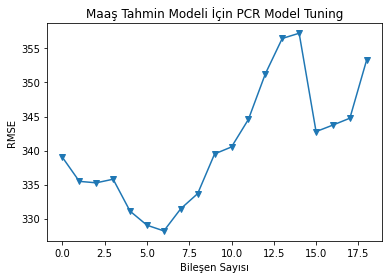

In [194]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [195]:
# Optimum bileşen sayısı 6

In [196]:
lm = LinearRegression()

In [197]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [198]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [199]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [200]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [201]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


İlk önce train ve test hatası hesaplanır. 

Tune ettiğimiz bir model için uygun olan hiperparametre bulunur.

Final parametresiyle final modeli train setiyle kurulur. 

Test setini değerlendirirken direkt sınamayla test hatasına gidilir.

# PLS

In [202]:
## PCR vs PLS kıyasla !! 272

## Model

In [203]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [204]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [205]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [206]:
pls_model = PLSRegression().fit(X_train, y_train) # 10 değişken varsa bileşenlerin hepsini getir
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [207]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [208]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [209]:
y_pred = pls_model.predict(X_train)

In [210]:
np.sqrt(mean_squared_error(y_train, y_pred)) # train hatası

310.1167593109696

In [211]:
r2_score(y_train, y_pred)

0.5140424486535481

In [212]:
y_pred = pls_model.predict(X_test)

In [213]:
np.sqrt(mean_squared_error(y_test, y_pred)) # test hatası

398.09956327448526

## Model Tuning

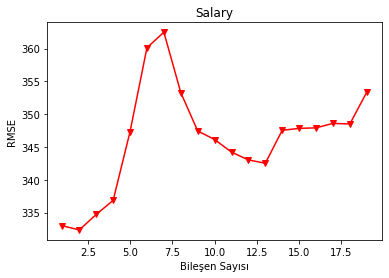

In [214]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [215]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [216]:
y_pred = pls_model.predict(X_test) # yeni final modelini test et

In [217]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

1. Çok boyutlu veriyi görselleştirme imkanı sağlar. Çok boyutlu veri setini iki bileşene indirgeyip veri setini iki eksen üzerinde görselleştirebiliriz.

2. Kavramsal indirgeme ile paha biçilmez bilgiler sunar. Eğer indirgeme işlemi sonrasında bileşenlerin içlerinde kalan değişkenler eğer aynı kavramları dolaylı olarak ifade eden değişkenler ise bu durumda bileşenler aslında latent/gizil/faktör/kavram değişkenlerdir. Bu durumda eğer birey ya da kurum özelinde bir analiz yapılıyorsa bu iki eksen görselleştirildiğinde ortaya çıkan grafiğin 4 köşesine düşen birey ya da kurumlar bize paha biçilmez bilgiler sunar. Öyle ki kendisinden çok değerli iş kararları çıkabilir.

3. Çoklu doğrusal bağlantı problemine çözüm sunar. Bu problemin ortaya çıktığı durumda eğer bileşenler indirgendikten sonra üzerlerine regresyon fit edilirse bu durumda bir gözetimsiz öğrenme yaklaşımı olan PCA, PCR olarak (principal component regression) bir gözetimli makine öğrenmesi tekniği olarak kullanılabilir hale gelir.

# 23.1. Ridge Regresyon'a Giriş (L2 regularization)

> Amaç: Hata kareler toplamını minimize eden katsayıları, bu katsayılara ceza uygulayarak bulmak. (Hoerl & Kennard 1970)

Ridge = L2= En küçük Kareler Toplamı + Lambda*(Ceza Parametresi)

Ridge Regresyon
1. Aşırı öğrenmeye(Over-fitting) karşı dirençlidir..
2. Yanlıdır fakat varyansı düşüktür. (Bazen yanlı modelleri daha çok tercih ederiz)
3. Çok fazla parametre olduğunda EKK'ya göre daha iyidir
    * EKK: klasik Regresyon
    
    SSE = Sum of squares error
4. Çok boyutlu lanetine karşı çözüm sunar. 
    * Çok boyutlu lanet: Değişken sayısının gözlem sayınından fazla olması p>n
5. Çoklu doğrusal banlantı problemi olduğunda etkilidir. 
    * Bağımsız parametreler arasında güçlü korelasyon varsa
    * Yani: Bir değişkenin taşıdığı bilgiyi başka bir değşken
6. Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.
7. Lamda kritik roldedir.  İki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.
8. lambda için iyi bir deper bulunması önemlidir. Bunun için Cross-Validation yöntemi kullanılır.

9. lambda Ayar Parametresinin Belirlenmesi
    * Ayar parametresi: Kullanıcı tarafından verilir.
    * Betalar= Bulunacak olan parametreler(veri setinden bulunur.)
10. Lambdanın sıfır olduğu yer: EKK'dır. HTK(SSE) Hata kareler toplamını minimun yapan lambdayı arıyoruz.

11. Lambda için belirli değerler içeren bir küme seçilir ve her birisi için cross validation test hatası hesepalanır.

12. En küçük cross validation'ı veren lambda ayar parametresi olarak seçilir.

13. Son olarak seçilen bu lambda ile model yeniden tüm gözlemlere fit edilir.

## Ridge Regresyon

1. amaç: Maaş tahmini yapmak. Bilgilileri alarak bu maaşı ön görebilmek
2. elimde geçmiş veriler,acaba bu kişiye ne kadar maaş verebilirim? 
3. Yüksek potansiyel oyuncular da tespit edilebilir.

In [218]:
# Gerekli kütüphanesi
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

Veri seti

Kategorik değişkenleri numerik değişkenlere dönüştürmliyiz. Bunun için pandas içindeki “get_dummies()”i kullanacağız.

“get_dummies()” içinde numerik değişkenlere dönüşücek kategorik değişkenleri yazıyoruz. Daha sonra veri setinden bu kategorik değişkenleri ve tahmin etmek istediğimiz değişkeni düşürüyoruz ve bunu X_’ye eşitliyoruz.

In [219]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna() # eksik değerleri uçurduk.
#one hot encoding dummy değişkeni
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"] # bağımlı değişken

#bağımsız değişken
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# test-train ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)
#amaç: Maaş tahmini yapmak. Bilgileri alarak bu maaşı ön görebilmek
# elimde geçmiş veriler, acaba bu kişiye ne kadar maaş verebilirim? 
#* Yüksek potansiyel oyuncular da tespit edilebilir.

dms’i incelediğimizde kategorik değişkenlerin 1 ve 0'lar ile numerik değişkenlere dönüştüğünü görüyoruz. Veri setinde her bir değişkenin bir tanesini kullanmamız yeterli olacaktır.

Dönüştürülen değişkenler ve X_’yi birleştirerek X’i elde ediyoruz. X, y’yi tahmin etmek için kullanacağımız bağımsız değişkenleri içeriyor. y’yi de tahmin etmek istediğimiz değişkene eşitliyoruz.

X_train ve y_train modeli geliştirmek için X_test ve y_test ise modeli test etmek için kullanılacak bağımlı ve bağımsız değişkenleri gösteriyor. Test_size verilerin % kaçını test için kullanılacağını (%30) belirtir. Burada herhangi bir değer belirtmezsek defaultta gelen 0.25 değeri kullanılır. Random_state ise programı her çalıştırdığımızda aynı ayrımı görmek için kullanılır.

In [220]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [221]:
df.shape

(263, 20)

In [222]:
# rigde model kurmak, train seti üzerinden modeli eğitmek
# alpha = lambda değeri oluyor
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [223]:
# ridge model nesnesi
ridge_model

Ridge(alpha=0.1)

In [224]:
#katsayıarı
ridge_model.coef_

#farklı lamda değerlerine karşı katsayıların değişimi nasıl olur?

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [225]:
#sabit katsayıarı
ridge_model.intercept_

#farklı lamda değerlerine karşı katsayıların değişimi nasıl olur?

-4.578626905721649

In [226]:
# değer oluşturmak için,
# ()
# bu lambda değerlerine karşı katsayılar nasıl değişiyor acaba?
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [227]:
lambdalar =10**np.linspace(10,-2,100)*.05
lambdalar

array([5.00000000e+08, 3.78231664e+08, 2.86118383e+08, 2.16438064e+08,
       1.63727458e+08, 1.23853818e+08, 9.36908711e+07, 7.08737081e+07,
       5.36133611e+07, 4.05565415e+07, 3.06795364e+07, 2.32079442e+07,
       1.75559587e+07, 1.32804389e+07, 1.00461650e+07, 7.59955541e+06,
       5.74878498e+06, 4.34874501e+06, 3.28966612e+06, 2.48851178e+06,
       1.88246790e+06, 1.42401793e+06, 1.07721735e+06, 8.14875417e+05,
       6.16423370e+05, 4.66301673e+05, 3.52740116e+05, 2.66834962e+05,
       2.01850863e+05, 1.52692775e+05, 1.15506485e+05, 8.73764200e+04,
       6.60970574e+04, 5.00000000e+04, 3.78231664e+04, 2.86118383e+04,
       2.16438064e+04, 1.63727458e+04, 1.23853818e+04, 9.36908711e+03,
       7.08737081e+03, 5.36133611e+03, 4.05565415e+03, 3.06795364e+03,
       2.32079442e+03, 1.75559587e+03, 1.32804389e+03, 1.00461650e+03,
       7.59955541e+02, 5.74878498e+02, 4.34874501e+02, 3.28966612e+02,
       2.48851178e+02, 1.88246790e+02, 1.42401793e+02, 1.07721735e+02,
      

In [228]:
ridge_model=Ridge()
katsayilar = []

for i in lambdalar:
    ## set params: parametreleri ayarlamak 
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    # her lambda bağımsız değişen sayısı kadar beta katsayılarını türemek
    katsayilar.append(ridge_model.coef_)
# katsayilar

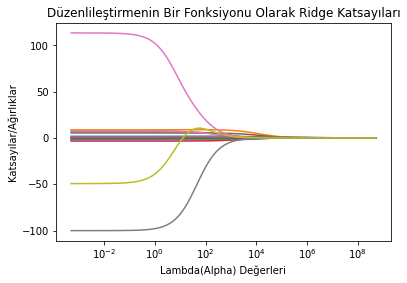

In [229]:
# nesne tanımla
ax= plt.gca()
# her bir lambda karşılık katsayılar nasıl değişyiro
ax.plot(lambdalar, katsayilar)
# ölçek değiştirme: logaritmiş ölçeklendirme
ax.set_xscale("log")

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

# farklı lambda değerlerine karşılık, katsayıların yani parametreler nasıl değişiyor
# ridge reg anlamsız parametreleri sıfıra yaklaşıyor.
# değerler artıkça ridge vurarak sıfıra yaklaştıyor.

#optimom lambda değerleri, hata oranıyla bilirkte nedir?
# farklı

# 23.3. Ridge Regresyon: Tahmin

In [230]:
# # train modelini
# ridge_model = Ridge().fit(X_train,y_train)
# ridge_model.get_params()

In [231]:
# y_pred: tahmin edilen y değerleri: Y Predicted
y_pred= ridge_model.predict(X_test)
y_pred[0:10]

array([ 612.05740678,  695.56254095, 1013.28398943,  410.07866539,
        415.43301887,  342.98878176,  661.06624485,  446.73492391,
        912.33754784,  644.99400405])

In [232]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.05314092747784

İlk başta “ridge” adında bir model yaratıyoruz ve modele hiçbir parametre vermeden X_train ve y_train ile eğitiyoruz. Bunun sonucunda aldığımız hata 357.053 oluyor. Daha sonra RidgeCV yi kullanarak bir cross validation işlemi uyguluyoruz. 

Bu işlem veri setimiz için en uygun parametreleri elde etmemizi sağlıyor. İşlem tamamlandıktan sonra elde ettiğimiz en iyi alpha değeri ile yeni bir model (ridge_tuned) kuruyoruz ve eğitiyoruz. Buradan elde ettiğimiz hata ise 331.299 oluyor.

In [233]:
# # y nin gerçek değerleri
# y_train[0:10]

In [234]:
# # ytain gerçek değer, y_pred: tahmin edilen değerl
# RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
# RMSE
# # RMSE: hata karaler toplamı
# # train hatası ama valide edilmemiş train hatası
#     # * Valide etmek için cross-validation yapmak gerek.
# # ilkel test hatası,

In [235]:
# np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train,
#                 cv=10, scoring = "neg_mean_squared_error")))


# # hatanını düşük olması her zaman iyi değildir.
# #cross validation ile bu hata 351 oldu. daha doğru hata. Model optimizsayonu için dikkat etmek gerek.

In [236]:
# # test hatası: test setinden başarımızı tahmin etmek istiyoruz.
# # test setinin gerçek değerleri, ve tahmin edilen değerli
# # x setinin içinde bulunan bağımsız değişkenleri kullanarak bağımlı y değişkenini tahmin et. Y Prediction
# y_pred =ridge_model.predict(X_test)

In [237]:
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
# RMSE

# # model kurduk, model optimuzasyonu

# 23.4. Ridge Regresyon: Model Tuning (Model Validation)

Lamda parametresi dışarı kaynaklı olduğu için modellemek gerekiyor.

Modellemek: Eğitim serisi içindeki bağımlı ve bağımsız değişkenler arasındaki ilişkiyi öğrendik. Modelledik.

Tahmin etmek: Kurmuş olduğumuz,öğrenmiş olduğumuz veri yapısını kullanarak onu bir fonksiyon kullanarak tahminde bulunmak. 

Elimizde, belli değişkenler geldiğinde onun maaşını tahmin etmek.

In [238]:
# ridge_model =Ridge().fit(X_train,y_train)
# y_pred= ridge_model.predict(X_test)
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
# RMSE
# #hangi lambda değeri min değeri veriyor acaba?

In [239]:
# ridge_model =Ridge(1).fit(X_train,y_train)
# y_pred= ridge_model.predict(X_test)
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
# RMSE
# #hangi lambda değeri min değeri veriyor acaba?

In [240]:
# ridge_model =Ridge(100).fit(X_train,y_train)
# y_pred= ridge_model.predict(X_test)
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
# RMSE
# #hangi lambda değeri min değeri veriyor acaba?

In [241]:
# modelleri deneme yapılma yoluyla gerçekleştirdiğimizde tune etmiş yani ayarlmış oluyoruz.
# en uygun parametre değerini bulmaya çalışıyoruz.
#lambdalar1 = np.random.randint(0,1000,100)
lambdalar =10**np.linspace(10,-2,100)*0.5
lambdalar[0:5]
# farklı lambda değerlerini oluşturup, farklı değerlere karşılık nasıl bir değişiklik meydana geliyor acaba

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [242]:
# farklı lambda değerlerine karşılık oluşan katsayılarındaki hatalar nelerdir?

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error", # istersek r'2, hata kareler ortalaması
                    cv= 10, # kaç katlı cross-validation olsun
                   normalize = True) # normalleştirme

In [243]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [244]:
#ridge cv içindeki optimum parametresi
ridge_cv.alpha_

0.7599555414764666

In [245]:
# final modeli
# tune edilmiş
ridge_tuned =Ridge(alpha = ridge_cv.alpha_ ).fit(X_train, y_train)

ridge_tuned

Ridge(alpha=0.7599555414764666)

In [246]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

356.8583047271516

In [247]:
# # test hatası, deği
# y_pred= ridge_tuned.predict(X_test)
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
# RMSE

# 201-4. Lasso Regresyon Modeli(L1 regularization)

Ürettiği modelin tahmin doğruluğunu ve yorumlanabilirliğini arttırmak için hem değişken seçimi hem de regularization yapar. Aynı ridge regresyonda olduğu gibi amaç hata kareler toplamını minimize eden katsayıları, katsayılara ceza uygularayarak bulmaktır. Fakat ridge regresyondan farklı olarak ilgisiz değişkenlerin katsayılarını sıfıra eşitler.

Amaç: Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. (Tibshirani 1996)

L1= Lasso Regresyonu
L2= Rigde Regresyonu

Özellikleri
1. Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
2. Lasso'da katsayıları sıfıra yaklaştırır.
3. Fakat L1 normu λ yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapmış olur.
4. λ'nın doğru seçilmesi çok önemlidir. Burada da Cross-validation kullanılır


 λ Ayar Parametresinin Belirlenmesi
 1.  λ'nın sıfır olduğu yer EKKdır, Hata Kareler Toplamı,HKT,nı minimum yapan  λ'yı arıyoruz.
 
 2.  λ için belirli deperleri içeren bir küme seçilir. Her birisi için crass validation test hatası hesaplanır.
 
 3. En küçük cross validation veren  λ ayar parametresi olarak seçilir. 
 
 4. Son olarak seçilen bu  λ ile model yeniden tüm gözlemlere fit edilir.

# 24.1. Lasso Regresyon'a Giriş

In [248]:
# Gerekli kütüphanesi
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [249]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
# bağımlı değişken, hedef değişken
y = df["Salary"]

#katergorik hallerini uçurduk.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [250]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [251]:
df.shape

(263, 20)

In [252]:
# model kuruldu.
lasso_model =Lasso(alpha = 0.1).fit(X_train,y_train)
lasso_model.get_params()

C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388069, tolerance: 3898.6869563806586
  positive)


{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [253]:
lasso_model

Lasso(alpha=0.1)

In [254]:
# sabit  değer
lasso_model.intercept_

-7.769490374097927

In [255]:
# bağımsız değişken katsayıları
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

“lasso” adındaki modelimizi oluşturup, eğittikten sonra elde ettiğimiz hata 331.238 oluyor. Daha sonra en iyi parametreleri bulmak için LassoCV yani cross validation uyguluyoruz. Son olarak da elde ettiğimiz parametrelerle yeni bir model kurup eğittiğimiz zaman hata 331.135 oluyor.

###  Lasso Regresyonda: Farklı lambda değerlerine karşılık katsayılar

C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741439134, tolerance: 3898.6869563806586
  positive)
C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679522634, tolerance: 3898.6869563806586
  positive)
C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561374865472, tolerance: 3898.6869563806586
  positive)
C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\sklearn

Text(0, 0.5, 'weights')

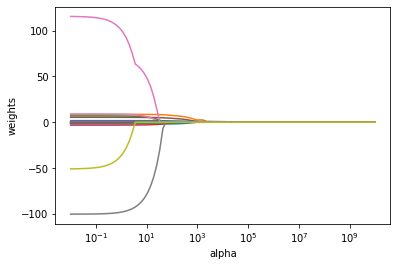

In [256]:
#lasso nesnesi    
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

# λ = alpha
for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Parametre değerleri artarsa Beta değeleri sıfır olur veya sıfıra yaklaşır.

# 24.3. Lasso Regresyon: Tahmin

In [257]:
lasso_model.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [258]:
#lasso_model.predict(X_train)[0:5]

In [259]:
# # test setinin bağımsız 
# lasso_model.predict(X_test)[0:5]

In [260]:
# test hatası
# y prediction

# test hastasını bulma: test setindeki bağımsız değişkenleri kullanarak test setindeki bağımlı yani salary maaşı bulmaya çalışıyoruz
y_pred = lasso_model.predict(X_test)


ilkel test hatası
1.  optimize edilmemeiş test hatası.
2. modeller ilerledikçe test hatası düşmeyebilir.
    * çünkü bazı modeller bazı problemlerde iyidir bazılarında kötüdür. 
    * ama ağaca dayallı modeller ilerledikçe daha düşük hatalar verir.

In [261]:
#ilkel test hatası
# optimize edilmemeiş test hatası.
# modeller ilerledikçe test hatası düşmeyebilir.
    # çünkü bazı modeller bazı problemlerde iyidir bazılarında kötüdür. 
    # ama ağaca dayallı modeller ilerledikçe daha düşük hatalar verir.
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

* r2 bağımsız değişkenler bağımlı değişkenlerin yüzde kaçını açıklayabilmektedir.
* regresyon problemleri için çok değerli bir söylemdir.

In [262]:
# # r2 bağımsız değişkenler bağımlı değişkenlerin yüzde kaçını açıklayabilmektedir.
# r2_score(y_test, y_pred)

#  24.4. Lasso Regresyon: Model Tuning

* optimum lamda değerini bulmak için LassoCV kullanmak

Lasso (Least Absolute Shrinkage and Selection Operator) Regresyon, en küçük kareler(EKK) yöntemine alternatif yanlı tahmin yöntemlerinden biridir. 

In [263]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000,
                         normalize = True)

In [264]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [265]:
# lambda değeri nedir?
lasso_cv_model.alpha_

0.3940612643247005

In [266]:
# # 1.gösterim
# # tune edilmiş, valid edilmiş. 
# lasso_tuned= Lasso().set_params(alpha = lasso_cv_model.alpha_ ).fit(X_train,y_train)
# lasso_tuned

In [267]:
lasso_tuned= Lasso(alpha = lasso_cv_model.alpha_ )

In [268]:
lasso_tuned.fit(X_train,y_train)
lasso_tuned

C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.94352401, tolerance: 3898.6869563806586
  positive)


Lasso(alpha=0.3940612643247005)

In [269]:
# lasso_cv_model =LassoCV(cv=10, max_iter =100000).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)

In [270]:
# ba
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958367

Ridge Regresyonu Lasso regresyonuna göre daha iyi sonuç vermiştir.

In [271]:
# lasso_cv_model =LassoCV(alphas = alphas, cv=10, max_iter =100000).fit(X_train,y_train)
# lasso_cv_model.alpha_

In [272]:
# # Lasso edilmiş, katsayıların isimlerini
# # katsayıların 0 olursa maaşa etkisi olmaz
# pd.Series(lasso_tuned.coef_,index =X_train.columns)

# # Yönetici geldi, çeşitli oyuncların bu değişkenleri verirsen maaşların ne olacğaını söylebilirim.

Ridge Regresyon ile Lasso Regresyon’nun çalışma yöntemi birbiri ile çok benzerdir. Her ikisi de bir ceza parametresi ile yanlı ancak düşük varyanslı modeller kurar. Formüllerinde ufak bir farklılık vardır. Ridge Regresyon ceza parametresi olarak lambda*katsayının karesi’ni kullanır. Lasso Regresyon ise lambda*katsayının mutlak değerini kullanır.

Ridge Regresyon’da herhangi bir parametre sıfıra eşitlenmez, yani değişken seçimi yapmaz. Lasso Regresyon bu özelliği ile daha sade ve yorumlanabilir modeller sunar. Tüm değişkenlerin mutlaka kullanılması gereken durumda ile Ridge Regresyon daha avantajlı olacaktır. Lasso Regresyon, Ridge Regresyona niteliksel olarak benzer davranışa yol açar, çünkü λ arttıkça, varyans azalır ve yanlılık artar. Lasso Regresyon, bir tahmin alt kümesini içeren daha basit ve daha yorumlanabilir modeller üretmesi açısından Ridge Regresyona göre büyük bir avantaja sahiptir.

# 25.1. ElasticNet Regresyon'a Giriş

Amaç: Hata kareler toplamını minimize eden katsayıları bulmak ve bu katsayılara bir ceza uygulayarak bulmaktır. 

        * ElastikNet= L1 + L2= Lasso + Ridge yaklaşımlarını birleştirir.  (Zou & Hastie 2005 )
        
        * Elasticnet: Ridge tarzı cezalandırma, lasso tarzı değişken seçimi




![ElasticNet= Ridge ve Lasso  görseli](https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png)


* lambda 1 + lambda 2 sanki bir lambda mıymış gibi bakacağız.

# 25.2. ElasticNet Regresyon: Model ve Tahmini

In [273]:
# Gerekli kütüphanesi
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [274]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [275]:
enet_model = ElasticNet().fit(X_train, y_train)

# bağımsız değişkenlerin katsayıları
enet_model.coef_

C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367338, tolerance: 3898.6869563806586
  positive)


array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [276]:
# sabit katsayılar
enet_model.intercept_

-6.465955602112217

## Tahmin

In [277]:
# bağımsız değişkenleri girdiğimizde 
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [278]:
# test seti bağımsız değişkenleri
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [279]:
# tahmini maaşı tahmin etme
y_pred= enet_model.predict(X_test)

In [280]:
# ilkel test hatası
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [281]:
r2_score(y_test,y_pred)
# bağımsız değişkenlerin maaşı açıklanma oranı

0.41070222469326934

# 25.3. ElasticNet Regresyon: Model Tuning

In [282]:
alphas = 10**np.linspace(10,-2,100)*0.5

ElasticNet regresyonu modeli için kullanılan çapraz doğrulama fonksiyonu aşağıdakilerden hangisidir?

In [283]:
from sklearn.linear_model import ElasticNet

In [284]:
#enet_cv_model = ElasticNetCV(alphas= alphas, cv=10).fit(X_train,y_train)
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train,y_train)
enet_cv_model.alpha_

5230.7647364798695

In [285]:
enet_cv_model.intercept_

-38.5194055839429

In [286]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

### Optimum alpha ile final

In [287]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [288]:
y_pred = enet_tuned.predict(X_test)
# Test setindeki bağımsız değişkenleri kullanarak y tahmin

In [289]:
# test seti için hatası
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

Bu problem için en iyi sonucu Lasso Regresyon modeli vermiştir.

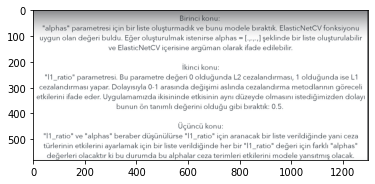

In [290]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("Lasso.png"))